In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv('../input/amazon-ratings/ratings_Beauty.csv')
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
df.shape

(2023070, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


Now let's clean our valuable data ;)

In [5]:
df.isnull().sum() #our data is very clean ...

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [6]:
df.duplicated().sum()

0

What is the number of users ,products ,and the total ratings  ?

In [7]:
print('The number of users are :',len(df.UserId.unique()))

The number of users are : 1210271


In [8]:
print('The number of products are:',len(df.ProductId.unique()))

The number of products are: 249274


In [9]:
print('The number of ratings are :',df.shape[0])

The number of ratings are : 2023070


What is the number of ratings per product ?

In [10]:
product_ratings=df.groupby('ProductId')['Rating'].count()
product_ratings.sort_values(ascending=False)

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B004U81OBC       1
B004U7R0EI       1
B004U7Q2O2       1
B004U7NKRE       1
B00LU0LTOU       1
Name: Rating, Length: 249274, dtype: int64

What is the of ratings per user?

In [11]:
user_ratings=df.groupby('UserId')['Rating'].count().sort_values(ascending=False)
user_ratings.head()

UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
Name: Rating, dtype: int64

What is the percentage of the products with 5 rate  ? 

In [12]:
len(df[df.Rating==5]['ProductId'].unique())/len(df['ProductId'].unique())#80% that looks good

0.8056636472315605

Let's describe the users :

In [13]:
user_ratings.head()

UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
Name: Rating, dtype: int64

In [14]:
high_rate=df[df.Rating==5]

In [15]:
rate4=df[df.Rating==4]

In [16]:
rate3=df[df.Rating==3]

In [17]:
rate2=df[df.Rating==2]

In [18]:
low_rate=df[df.Rating==1]

In [19]:
print('The number of users who make 5 rate on products is :',len(high_rate['UserId'].unique()))
print('The number of users who make 4 rate on products is :',len(rate4['UserId'].unique()))
print('The number of users who make 3 rate on products is :',len(rate3['UserId'].unique()))
print('The number of users who make 2 rate on products is :',len(rate2['UserId'].unique()))
print('The number of users who make 1 rate on products is :',len(low_rate['UserId'].unique()))

The number of users who make 5 rate on products is : 824697
The number of users who make 4 rate on products is : 238261
The number of users who make 3 rate on products is : 140097
The number of users who make 2 rate on products is : 99470
The number of users who make 1 rate on products is : 162401


What is the number of the total low rating?

<AxesSubplot:title={'center':'The amazon rating representaion '}>

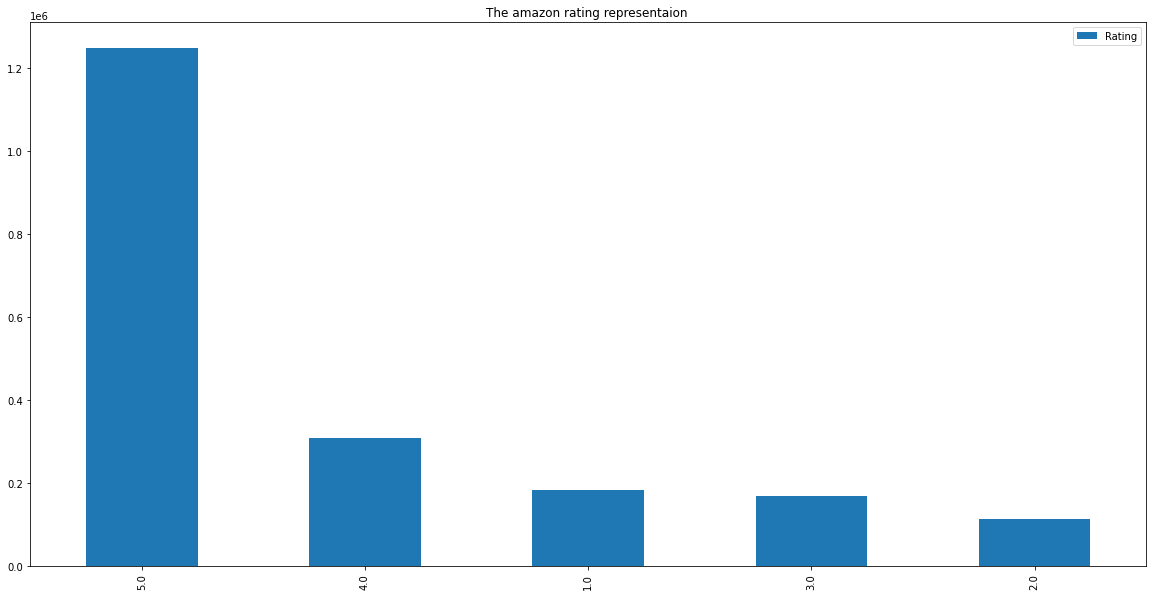

In [20]:
df.Rating.value_counts().to_frame().plot(kind='bar',figsize=(20,10),title='The amazon rating representaion ')